In [1]:
#Pull in the libraries we need to read and print json files from the internet
import json
import requests
import pandas as pd
from pprint import pprint

#Pull in the url manipulation and a few different image libraries
from PIL import Image
import IPython
from IPython.display import display
import urllib.request
from io import BytesIO 

In [2]:
url = 'https://api.nasa.gov/planetary/earth/imagery'

In [3]:
params = {
    "lon": 100.75,        # Longitude
    "lat": 1.5,           # Latitude
    "date": "2014-02-01", # Date of image
    "dim": 0.025,         # Width and height of image in degrees
    "api_key": "YB0RtB4G8M4Hnt27Z8DjOnAWIFDVDU1AV0mUm6qa"
}

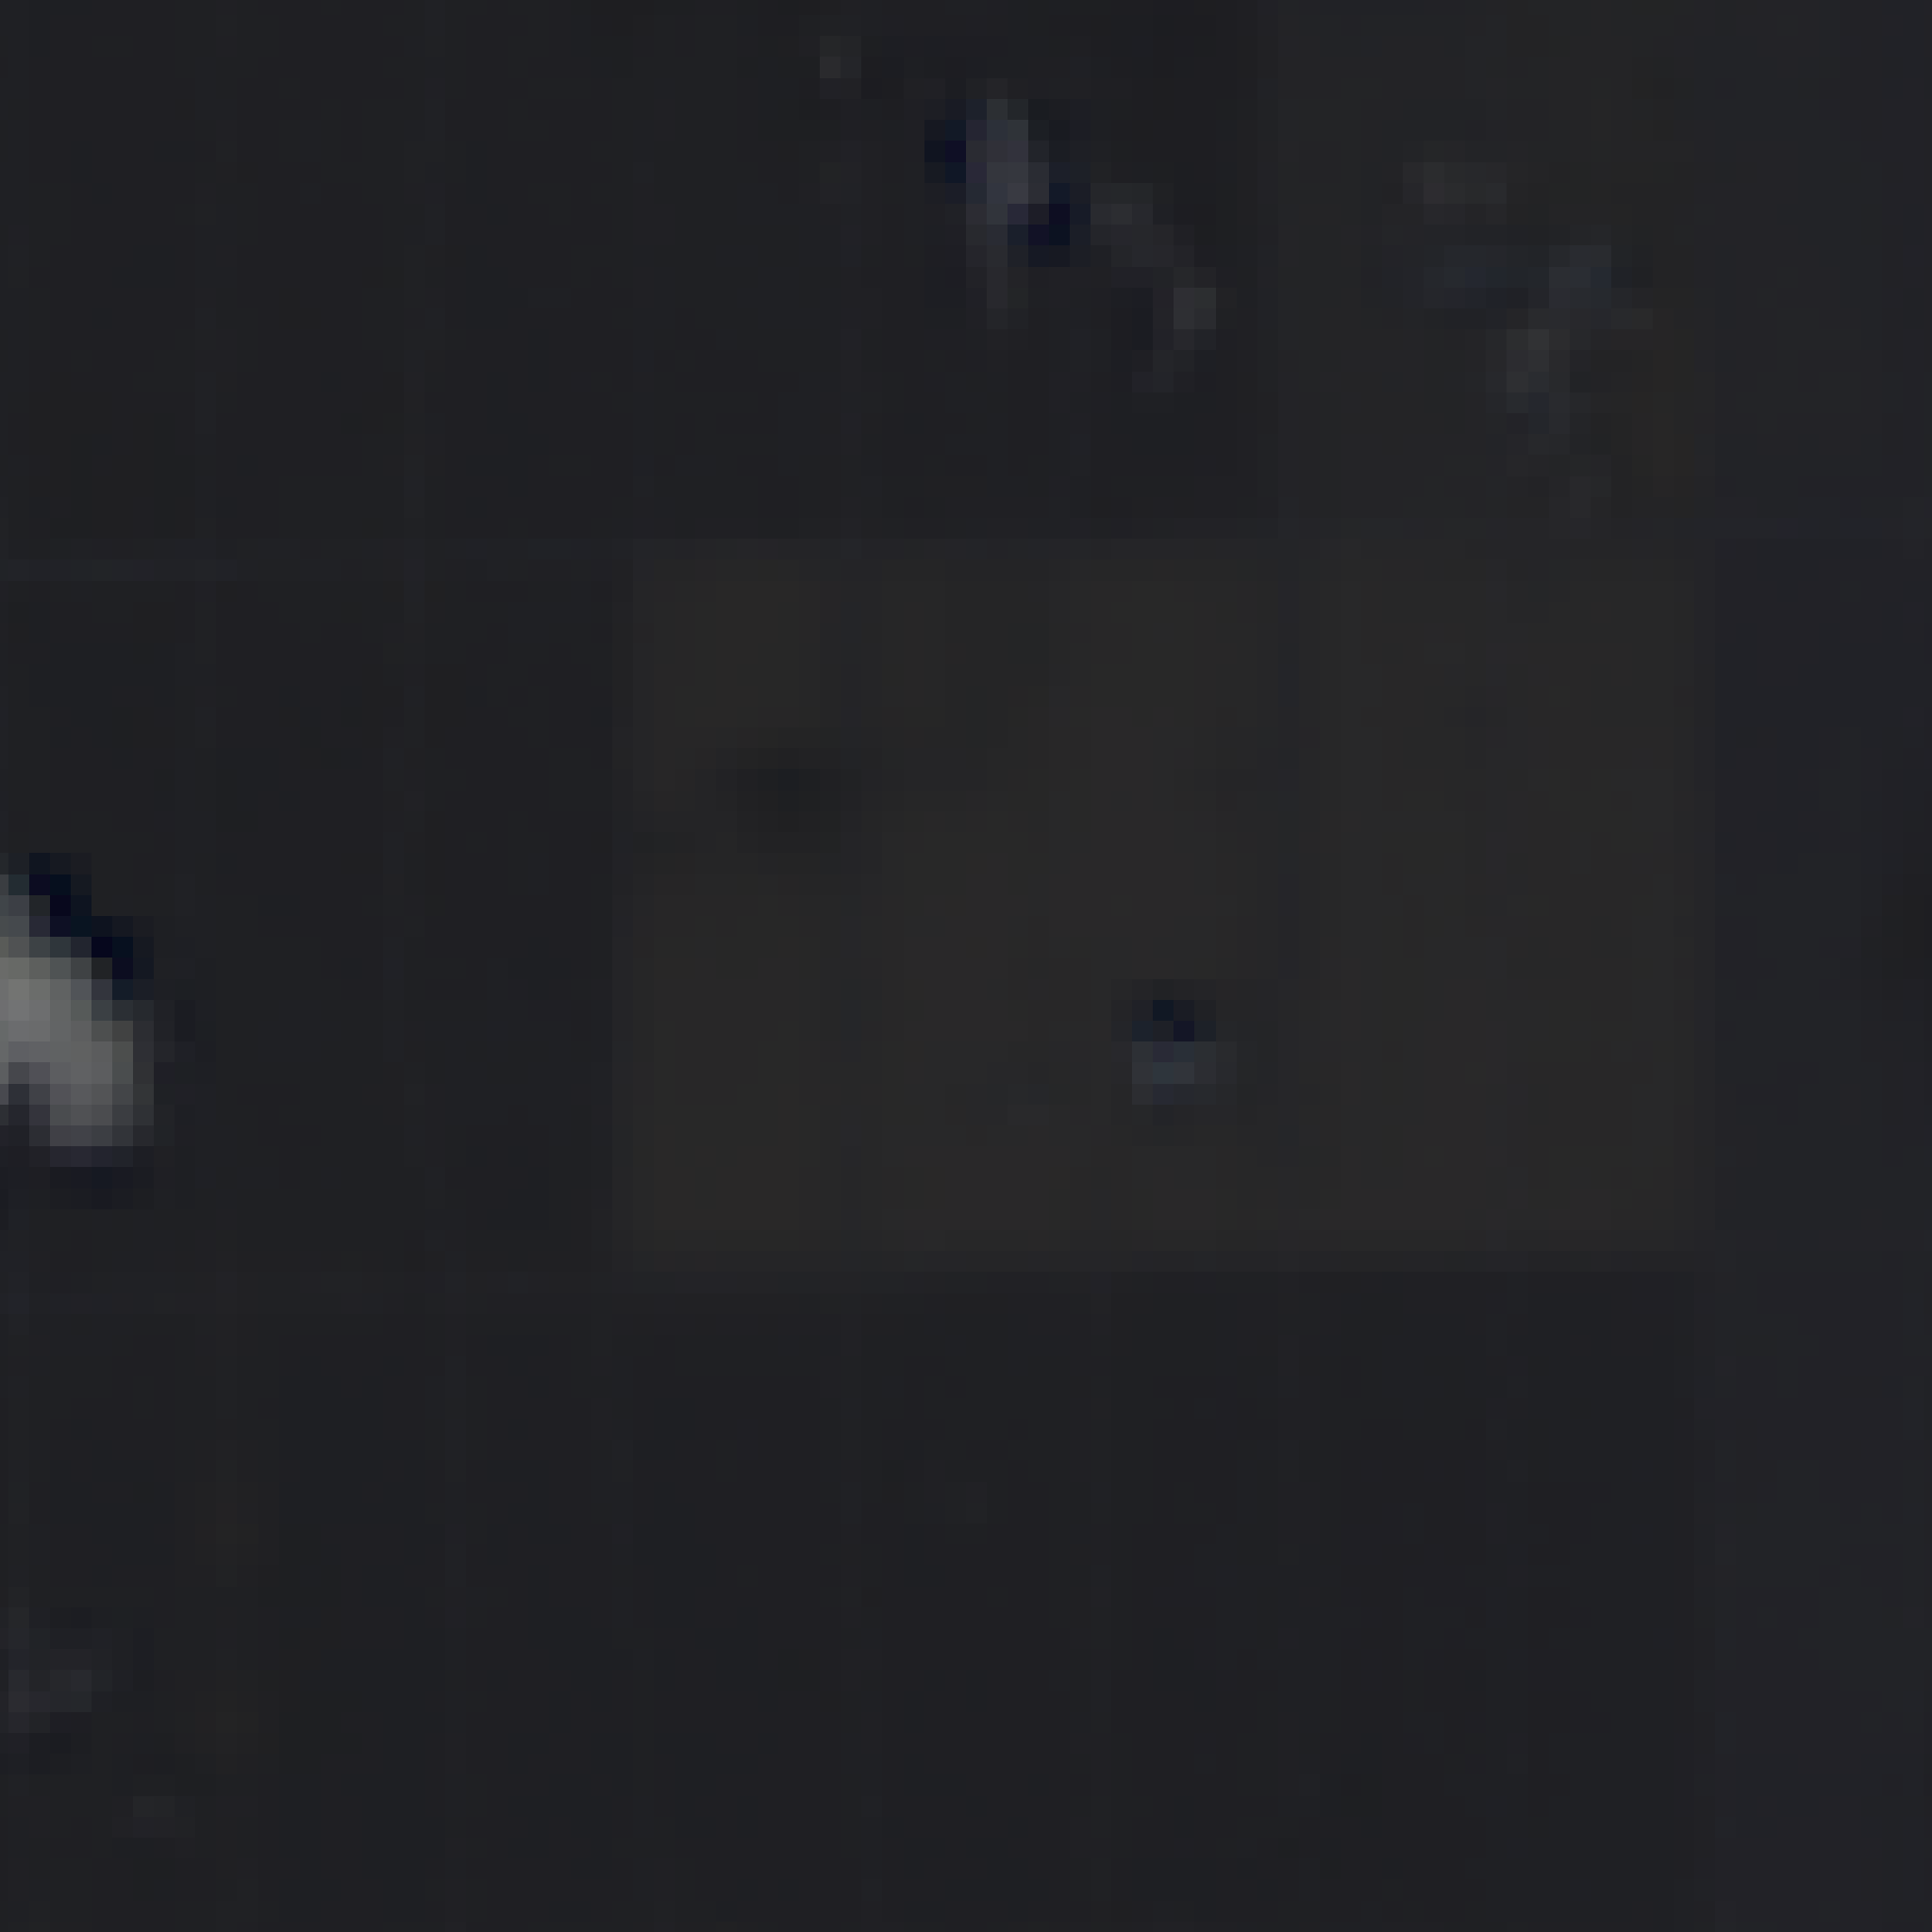

In [4]:
try:
    # Send the request to the API
    response = requests.get(url, params=params)
    
    image = Image.open(BytesIO(response.content))
    display(image)
            
except Exception as e:
    print(f"An error occurred: {e}")